In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
dataset1 = pd.read_csv('/content/linear.csv')
X = dataset1[['x']].values
y = dataset1[['y']].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [33]:
# Name: Midhun S
# Register Number:212223240087
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,8)
        self.fc2=nn.Linear(8,10)
        self.fc3=nn.Linear(10,1)
        self.relu=nn.ReLU()
        self.history={'loss':[]}
  def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [34]:
ai= NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai.parameters(),lr=0.001)

In [35]:
# Name: Midhun S
# Register Number:212223240087
def train_model(ai, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [36]:
train_model(ai, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 425.766876
Epoch [200/2000], Loss: 158.107330
Epoch [400/2000], Loss: 13.540803
Epoch [600/2000], Loss: 6.308666
Epoch [800/2000], Loss: 2.431146
Epoch [1000/2000], Loss: 0.280438
Epoch [1200/2000], Loss: 0.003306
Epoch [1400/2000], Loss: 0.009089
Epoch [1600/2000], Loss: 0.006383
Epoch [1800/2000], Loss: 0.001171


In [37]:
with torch.no_grad():
    test_loss = criterion(ai(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.031071


In [38]:
loss_df = pd.DataFrame(ai.history)

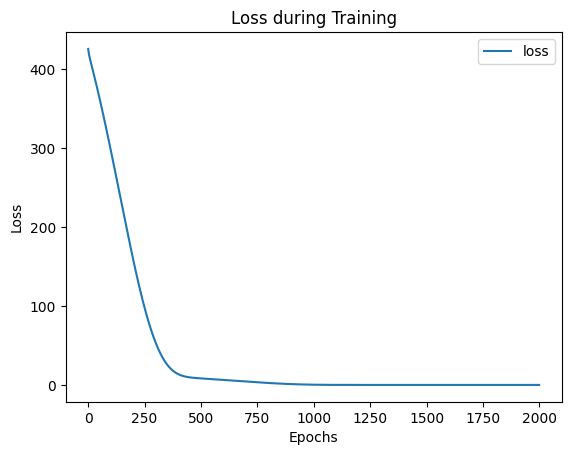

In [39]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [40]:
X_n1_1 = torch.tensor([[1]], dtype=torch.float32)
prediction = ai(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print('Prediction: {:.1f}'.format(prediction))

Prediction: 11.4


In [41]:
X_n1_1 = torch.tensor([[20]], dtype=torch.float32)
prediction = ai(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print('Prediction: {:.0f}'.format(prediction))

Prediction: 30
